In [60]:
from __future__ import annotations
import cv2
from matplotlib import pyplot as plt
from typing import Any, Sequence


In [63]:
# We encapsulate the image and its associated data in a class

class Img:
    img : cv2.Mat
    contours : Sequence[cv2.Mat]
    src_path : str
    original : cv2.Mat
    transformations : list[cv2.Mat]
    track : bool

    def __init__(self, src, track = True) -> None:
        self.img = cv2.imread(src, cv2.IMREAD_GRAYSCALE)
        self.original = cv2.imread(src)
        self.src_path = src
        self.contours = None
        self.transformations = []
        self.track = track

    def _update(self, new_img) -> Img:
        """Replace image data with new-img with tracking."""
        if self.track:
            self.transformations.append(self.img)
        self.img = new_img
        return self

    def _scaled_shape(self, scale_w: float, scale_h: float) -> tuple:
        """Get scaled dimensions of the image."""
        w, h = self.img.shape
        return (round(w*scale_w), round(h*scale_h))
    
    def show(self, **kwargs) -> Img:
        """Print image as gray scale image."""
        if self.contours:
            img = self.original.copy()
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.drawContours(img, self.contours, -1, color = (255,0,0), thickness=2)
            plt.imshow(img)
        else:
            plt.imshow(self.img, **(kwargs | {'cmap': "gray", 'vmin': 0, 'vmax': 255}))
        plt.xticks([])
        plt.yticks([])
        plt.show()
        return self

    def show_transformations(self, **kwargs) -> Img:
        """Show all transformations of the image."""
        imgs = self.transformations + [ self.img ]
        n = len(imgs)
        cols = 3
        rows = (n // cols) + 1
        for i in range(len(imgs)):
            plt.subplot(rows, cols, i+1)
            plt.imshow(imgs[i], **(kwargs | {'cmap': "gray", 'vmin': 0, 'vmax': 255}))
            plt.xticks([])
            plt.yticks([])
        plt.show()
        return self

    def binarize(self) -> Img:
        """Convert IMG to an inverted binary black-white-picture."""
        _, img = cv2.threshold(self.img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_TRIANGLE)
        return self._update(img)

    def morph_dilate(self) -> Img:
        """Smear the image horizontally."""
        kernel_size = self._scaled_shape(0.10, 0.01)
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
        print(f"Image size {self.img.shape}, using kernel {kernel_size}")
        img = cv2.morphologyEx(self.img, cv2.MORPH_DILATE, kernel)
        return self._update(img)
    
    def morph_open(self) -> Img:
        """Apply erosion and dilation on the picture."""
        kernel_size = (5,5)
        kernel =cv2.getStructuringElement(cv2.MORPH_RECT, kernel_size)
        print(f"Image size {self.img.shape}, using kernel {kernel_size}")
        img = cv2.morphologyEx(self.img, cv2.MORPH_OPEN, kernel_size)
        return self._update(img)

    def find_contours(self) -> Img:
        """Find contours."""
        img = self.img.copy()
        cntrs, hierachy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        self.contours = cntrs
        return self




Image size (3723, 2692), using kernel (372, 27)
Image size (3723, 2692), using kernel (5, 5)


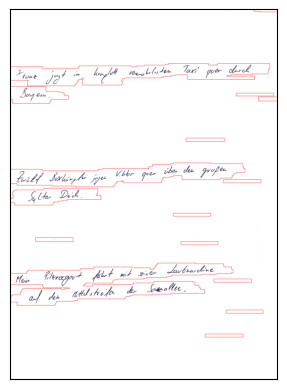

In [67]:
BILD_DUNKLER_RAND="/home/jv/Bilder/010.jpeg"
BILD_BEIGE="/home/jv/Bilder/014.jpeg"
BILD_BUNTER_RAND="/home/jv/Bilder/016.jpg"
BILD_GUT="/home/jv/Bilder/testdokument_009.png"

# img = Img(BILD_BEIGE)
# img.binarize()
# img.morph_dilate()
# img.morph_open()
# img.show_transformations()

img = Img(BILD_GUT)
img.binarize().morph_dilate().morph_open().find_contours()
img.show();

  
